In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
game040522 = pd.read_csv("YakkertechData/04_05_2022 San Diego@UC San Diego.csv")
game040822 = pd.read_csv("YakkertechData/04_08_2022 6_06_03 PM-UC Irvine@UC San Diego.csv")
game041922 = pd.read_csv("YakkertechData/04_19_2022 5_42_43 PM-San Diego State@UC San Diego.csv")
game042622 = pd.read_csv("YakkertechData/04_26_2022 12_41_15 PM-UC San Diego@UC San Diego.csv")
game042922 = pd.read_csv("YakkertechData/04_29_2022 6_13_28 PM-UC Riverside@UC San Diego Friday.csv")
game043022 = pd.read_csv("YakkertechData/04_30_2022 1_51_31 PM-UC Riverside@UC San Diego Saturday.csv")
game050122 = pd.read_csv("YakkertechData/05_01_2022 12_46_25 PM-UC Riverside@UC San Diego Sunday.csv")
game050622 = pd.read_csv("YakkertechData/05_06_2022 6_12_16 PM-Cal State Fullerton@UC San Diego Friday.csv")
game050722 = pd.read_csv("YakkertechData/05_07_2022 1_38_58 PM-Cal State Fullerton@UC San Diego Saturday.csv")
game050822 = pd.read_csv("YakkertechData/05_08_2022 12_51_13 PM-Cal State Fullerton@UC San Diego Sunday.csv")
game052022 = pd.read_csv("YakkertechData/05_20_2022 6_28_33 PM-Hawaii@UC San Diego Friday.csv")
game052122 = pd.read_csv("YakkertechData/05_21_2022 1_49_44 PM-Hawaii@UC San Diego Saturday.csv")
game052222 = pd.read_csv("YakkertechData/05_22_2022 12_54_59 PM-Hawaii@UC San Diego Sunday.csv")
game041422 = pd.read_csv("YakkertechData/UCSD_4_14_22 - UCSD_4_14_22.csv.csv")
game041522 = pd.read_csv("YakkertechData/UCSD_4_15_22 - UCSD_4_15_22.csv.csv")
game041622 = pd.read_csv("YakkertechData/UCSD_4_16_22 - UCSD_4_16_22.csv.csv")

In [3]:
yakkLst = [game040522, game040822, game041922, game042622, game042922, game043022, game050122, game050622, game050722, game050822, game052022, game052122, game052222]
trackManLst = [game041422, game041522, game041622]
yakkData = pd.concat(yakkLst)
trackData = pd.concat(trackManLst)

In [4]:
ucsdPitcherData = yakkData[yakkData.PitcherTeam == 'Uc san diego']
ucsdPitcherFastballs = ucsdPitcherData[(ucsdPitcherData.TaggedPitchType == 'Fastball') | (ucsdPitcherData.TaggedPitchType == 'Sinker')]

In [5]:
coledaleFB = ucsdPitcherFastballs[ucsdPitcherFastballs.Pitcher == 'Cole Dale']
ryanrissasFB = ucsdPitcherFastballs[ucsdPitcherFastballs.Pitcher == 'Ryan Rissas']
izaakmartinezFB = ucsdPitcherFastballs[ucsdPitcherFastballs.Pitcher == 'Izaak Martinez']
ryanforcucciFB = ucsdPitcherFastballs[ucsdPitcherFastballs.Pitcher == 'Ryan Forcucci']
arenalvarezFB = ucsdPitcherFastballs[ucsdPitcherFastballs.Pitcher == 'Aren Alvarez']
joeysoberonFB = ucsdPitcherFastballs[ucsdPitcherFastballs.Pitcher == 'Joey Soberon']
ethanholtFB = ucsdPitcherFastballs[ucsdPitcherFastballs.Pitcher == 'Ethan Holt']
samhasegawaFB = ucsdPitcherFastballs[ucsdPitcherFastballs.Pitcher == 'Sam Hasegawa']
zackernisseFB = ucsdPitcherFastballs[ucsdPitcherFastballs.Pitcher == 'Zach Ernisse']
nolanmccrackenFB = ucsdPitcherFastballs[ucsdPitcherFastballs.Pitcher == 'Nolan Mccracken']
chrisgilmartinFB = ucsdPitcherFastballs[ucsdPitcherFastballs.Pitcher == 'Chris Gilmartin']
zachtonnerreFB = ucsdPitcherFastballs[ucsdPitcherFastballs.Pitcher == 'Zach Tonnerre']
ucsdFBLst = [arenalvarezFB, coledaleFB, zackernisseFB, ryanforcucciFB, chrisgilmartinFB, samhasegawaFB, ethanholtFB, izaakmartinezFB, nolanmccrackenFB, ryanrissasFB, joeysoberonFB, zachtonnerreFB]

In [6]:
def addidxcolumn(df):
    if "index" in df.columns:
        df = df.set_index("index")
        return df
    df.insert(loc = 0, column = "index", value = range(df.shape[0]))
    df = df.set_index("index")
    return df

In [9]:
# Convert string data in form "hour:minute" to numerical form based on total minutes. For example, a value of 90 would be 
# equivalent to "1:30". "12:00" is represented as 0 for a RHP and 720 for a LHP to avoid skewing averages as RHP will have
# lower tiltpoint scores and LHP will have higher tiltpoint scores on fastballs
# Takes in a data frame and returns a series
def tiltConv(pitcherdf):
    hand = pitcherdf.PitcherThrows.iloc[0]
    def toTiltpoints(tilt):
        tilt = str(tilt)
        colonpos = tilt.find(':')
        tiltpts = 0
        if (hand == 'Right') & (int(tilt[:colonpos]) == 12):
            tiltpts += int(tilt[colonpos + 1:])
        else:
            tiltpts += (int(tilt[:colonpos]) * 60) + int(tilt[colonpos + 1:])
        return tiltpts
    tiltptseries = pitcherdf[pitcherdf.Tilt.notnull()].Tilt.apply(toTiltpoints)
    return tiltptseries

# Gets middle 95 percent of the data to eliminate outliers/misreads
def mid95mean(dataSeries):    
    serieslst = list(dataSeries)
    if len(serieslst) < 3:
        return np.mean(serieslst)
    lower = np.percentile(serieslst, 2.5)
    upper = np.percentile(serieslst, 97.5)
    getmid = lambda val: (val >= lower) & (val <= upper)
    midlst = list(filter(getmid, serieslst))
    return np.mean(midlst)

def createTable(pitcherdflst):
    fullData = []
    columns = ['Name', 'Count', 'Velocity', 'Spin Rate', 'Efficiency', 'Tilt', 'Vertical Break', 'Horizontal Break', 'Miss %', 'SLG %', 'Strike %', 'Hard Hit %']
    for pitcher in pitcherdflst:
        name = pitcher.Pitcher.iloc[0]
        count = pitcher.shape[0]
        if pitcher[(pitcher.PitchCall == 'StrikeSwinging') | (pitcher.PitchCall == 'Foul') | (pitcher.PitchCall == 'InPlay')].shape[0] == 0:
            missrate = "no swings"
        else:
            missrate = pitcher[pitcher.PitchCall == 'StrikeSwinging'].shape[0] / pitcher[(pitcher.PitchCall == 'StrikeSwinging') | (pitcher.PitchCall == 'Foul') | (pitcher.PitchCall == 'InPlay')].shape[0] * 100
            missrate = round(missrate, 2)
        if pitcher[pitcher.KorBB == 'Strikeout'].shape[0] + pitcher[pitcher.PitchCall == 'InPlay'].shape[0] == 0:
            slg = "no result"
        else:
            slg = (pitcher[pitcher.PlayResult == 'Single'].shape[0] + pitcher[pitcher.PlayResult == 'Double'].shape[0]*2 + pitcher[pitcher.PlayResult == 'Triple'].shape[0]*3 + pitcher[pitcher.PlayResult == 'HomeRun'].shape[0]*4) / (pitcher[pitcher.KorBB == 'Strikeout'].shape[0] + pitcher[pitcher.PitchCall == 'InPlay'].shape[0])
            slg = round(slg, 3)
        strike = pitcher[pitcher.PitchCall != 'BallCalled'].shape[0] / pitcher.shape[0] * 100
        if pitcher[(pitcher.ExitSpeed.notnull()) & (pitcher.PitchCall == 'InPlay')].shape[0] == 0:
            hardhit = "no BIP"
        else:
            hardhit = pitcher[(pitcher.ExitSpeed >= 95) & (pitcher.PitchCall == 'InPlay')].shape[0] / pitcher[(pitcher.ExitSpeed.notnull()) & (pitcher.PitchCall == 'InPlay')].shape[0] *100
            hardhit = round(hardhit, 2)
        velo = mid95mean(pitcher[pitcher.RelSpeed.notnull()].RelSpeed)
        spin = mid95mean(pitcher[pitcher.SpinRate.notnull()].SpinRate)
        efficiency = mid95mean(pitcher[pitcher.yt_Efficiency.notnull()].yt_Efficiency)
        tiltpoints = mid95mean(tiltConv(pitcher))
        tiltminutes = str(int(tiltpoints % 60))
        if int(tiltminutes) < 10:
            tiltminutes = "0" + tiltminutes
        tilt = str(int(tiltpoints // 60)) + ":" + tiltminutes
        vb = mid95mean(pitcher[pitcher.InducedVertBreak.notnull()].InducedVertBreak)
        hb = mid95mean(pitcher[pitcher.HorzBreak.notnull()].HorzBreak)
        pitcherlst = [name, count, round(velo, 1), int(round(spin, 0)), round(efficiency, 1), tilt, round(vb, 1), round(hb, 1), missrate, slg, round(strike, 2), hardhit]
        fullData.append(pitcherlst)
    table = pd.DataFrame(fullData, columns = columns)
    table = table.set_index('Name')
    return table

ucsdFBstats = createTable(ucsdFBLst)
ucsdFBstats

,Count,Velocity,Spin Rate,Efficiency,Tilt,Vertical Break,Horizontal Break,Miss %,SLG %,Strike %,Hard Hit %
Name,,,,,,,,,,,
Aren Alvarez,102,91.4,2288,98.8,1:06,15.1,8.8,10.20,0.423,67.65,25.00
Cole Dale,87,85.8,1953,72.8,1:17,11.6,6.8,21.43,0.250,52.87,33.33
Zach Ernisse,208,88.7,1953,93.2,11:04,14.2,-7.1,12.15,0.434,66.83,20.00
Ryan Forcucci,143,91.5,2273,98.9,1:31,13.4,10.1,15.38,0.188,72.73,20.83
Chris Gilmartin,20,82.3,1995,99.2,11:12,16.9,-6.5,14.29,0.200,50.00,25.00
Sam Hasegawa,50,83.0,1826,85.9,11:44,15.2,-1.2,4.55,0.444,60.00,33.33
Ethan Holt,81,86.9,1787,86.5,1:36,10.5,9.0,0.00,0.500,67.90,36.36
Izaak Martinez,107,86.7,2328,96.2,11:27,17.9,-3.9,13.33,0.240,62.62,11.11
Nolan Mccracken,45,89.5,2245,90.3,0:35,15.8,2.9,13.64,0.333,64.44,0.00


In [10]:
arenalvarezSL = ucsdPitcherData[(ucsdPitcherData.Pitcher == 'Aren Alvarez') & (ucsdPitcherData.TaggedPitchType == 'Slider')]
coledaleSL = ucsdPitcherData[(ucsdPitcherData.Pitcher == 'Cole Dale') & (ucsdPitcherData.TaggedPitchType == 'Slider')]
zackernisseSL = ucsdPitcherData[(ucsdPitcherData.Pitcher == 'Zach Ernisse') & (ucsdPitcherData.TaggedPitchType == 'Slider')]
ryanforcucciSL = ucsdPitcherData[(ucsdPitcherData.Pitcher == 'Ryan Forcucci') & (ucsdPitcherData.TaggedPitchType == 'Slider')]
chrisgilmartinSL = ucsdPitcherData[(ucsdPitcherData.Pitcher == 'Chris Gilmartin') & (ucsdPitcherData.TaggedPitchType == 'Slider')]
samhasegawaSL = ucsdPitcherData[(ucsdPitcherData.Pitcher == 'Sam Hasegawa') & ((ucsdPitcherData.TaggedPitchType == 'Slider') | (ucsdPitcherData.TaggedPitchType == 'Changeup'))]
ethanholtSL = ucsdPitcherData[(ucsdPitcherData.Pitcher == 'Ethan Holt') & (ucsdPitcherData.TaggedPitchType == 'Slider')]
nolanmccrackenSL = ucsdPitcherData[(ucsdPitcherData.Pitcher == 'Nolan Mccracken') & (ucsdPitcherData.TaggedPitchType == 'Slider')]
ucsdSLlst = [arenalvarezSL, coledaleSL, zackernisseSL, ryanforcucciSL, chrisgilmartinSL, samhasegawaSL, ethanholtSL, nolanmccrackenSL]
ucsdSLStats = createTable(ucsdSLlst)
ucsdSLStats

,Count,Velocity,Spin Rate,Efficiency,Tilt,Vertical Break,Horizontal Break,Miss %,SLG %,Strike %,Hard Hit %
Name,,,,,,,,,,,
Aren Alvarez,76,80.5,2527,23.9,7:55,1.9,-6.2,62.5,0.19,68.42,25.0
Cole Dale,62,77.8,2047,27.9,8:38,1.7,-7.1,30.0,0.417,51.61,33.33
Zach Ernisse,49,77.9,2328,50.7,4:58,-6.8,7.0,30.0,0.0,48.98,0.0
Ryan Forcucci,32,83.1,2424,26.7,8:46,2.1,-6.5,72.73,0.167,46.88,0.0
Chris Gilmartin,2,73.2,2135,18.9,4:00,1.6,6.0,no swings,no result,0.00,no BIP
Sam Hasegawa,7,76.7,2041,32.8,1:24,8.0,6.0,0.0,no result,28.57,no BIP
Ethan Holt,39,79.1,1727,33.9,9:46,6.4,-3.1,15.0,0.571,74.36,20.0
Nolan Mccracken,18,76.3,2503,53.5,7:46,-1.9,-9.9,44.44,0.0,61.11,0.0


In [11]:
izaakmartinezCB = ucsdPitcherData[(ucsdPitcherData.Pitcher == 'Izaak Martinez') & (ucsdPitcherData.TaggedPitchType == 'Curveball')]
ryanrissasCB = ucsdPitcherData[(ucsdPitcherData.Pitcher == 'Ryan Rissas') & (ucsdPitcherData.TaggedPitchType == 'Curveball')]
joeysoberonCB = ucsdPitcherData[(ucsdPitcherData.Pitcher == 'Joey Soberon') & ((ucsdPitcherData.TaggedPitchType == 'Curveball') | (ucsdPitcherData.TaggedPitchType == 'Slider'))]
ucsdCBlst = [izaakmartinezCB, ryanrissasCB, joeysoberonCB]
ucsdCBStats = createTable(ucsdCBlst)
ucsdCBStats

,Count,Velocity,Spin Rate,Efficiency,Tilt,Vertical Break,Horizontal Break,Miss %,SLG %,Strike %,Hard Hit %
Name,,,,,,,,,,,
Izaak Martinez,2,78.3,2333,34.1,5:00,-4.1,6.1,0.00,1.00,50.00,no BIP
Ryan Rissas,30,76.1,2405,51.8,5:28,-9.2,5.1,54.55,0.00,50.00,0.0
Joey Soberon,26,77.0,1647,58.0,6:37,-5.1,-4.1,45.45,0.25,65.38,0.0


In [12]:
arenalvarezCH = ucsdPitcherData[(ucsdPitcherData.Pitcher == 'Aren Alvarez') & (ucsdPitcherData.TaggedPitchType == 'Changeup')]
coledaleCH = ucsdPitcherData[(ucsdPitcherData.Pitcher == 'Cole Dale') & (ucsdPitcherData.TaggedPitchType == 'Changeup')]
zackernisseCH = ucsdPitcherData[(ucsdPitcherData.Pitcher == 'Zach Ernisse') & (ucsdPitcherData.TaggedPitchType == 'Changeup')]
ryanforcucciCH = ucsdPitcherData[(ucsdPitcherData.Pitcher == 'Ryan Forcucci') & (ucsdPitcherData.TaggedPitchType == 'Changeup')]
chrisgilmartinCH = ucsdPitcherData[(ucsdPitcherData.Pitcher == 'Chris Gilmartin') & (ucsdPitcherData.TaggedPitchType == 'Changeup')]
ethanholtCH = ucsdPitcherData[(ucsdPitcherData.Pitcher == 'Ethan Holt') & (ucsdPitcherData.TaggedPitchType == 'Changeup')]
izaakmartinezCH = ucsdPitcherData[(ucsdPitcherData.Pitcher == 'Izaak Martinez') & (ucsdPitcherData.TaggedPitchType == 'Changeup')]
joeysoberonCH = ucsdPitcherData[(ucsdPitcherData.Pitcher == 'Joey Soberon') & (ucsdPitcherData.TaggedPitchType == 'Changeup')]
ucsdCHlst = [arenalvarezCH, coledaleCH, zackernisseCH, ryanforcucciCH, chrisgilmartinCH, ethanholtCH, izaakmartinezCH, joeysoberonCH]
ucsdCHStats = createTable(ucsdCHlst)
ucsdCHStats

,Count,Velocity,Spin Rate,Efficiency,Tilt,Vertical Break,Horizontal Break,Miss %,SLG %,Strike %,Hard Hit %
Name,,,,,,,,,,,
Aren Alvarez,4,81.8,1971,98.7,1:30,12.7,11.9,100.00,no result,75.00,no BIP
Cole Dale,5,81.7,1401,94.5,2:00,7.8,10.2,0.00,0.333,60.00,100.0
Zach Ernisse,17,80.9,1507,92.5,10:28,10.4,-9.2,16.67,0.5,41.18,0.0
Ryan Forcucci,5,86.3,1898,99.5,2:37,4.5,9.7,0.00,0.667,80.00,50.0
Chris Gilmartin,8,77.1,1476,99.1,10:51,13.2,-7.9,100.00,no result,50.00,no BIP
Ethan Holt,9,82.3,1902,96.1,2:40,4.1,15.0,0.00,1.667,33.33,33.33
Izaak Martinez,14,81.0,1682,96.8,11:00,13.8,-6.8,50.00,0.833,85.71,66.67
Joey Soberon,27,78.4,1385,75.6,2:07,6.7,8.4,46.15,0.0,55.56,33.33


In [193]:
heartleft = -6.67 / 12
heartright = 6.67 / 12
heartdown = 22 / 12
heartup = 38 / 12
spot1left = -13.33 / 12
spot1right = heartleft
spot1up = heartdown
spot1down = 14 / 12
spot2left = heartright
spot2right = 13.33 / 12
spot2up = spot1up
spot2down = spot1down
spot3down = heartup
spot3up = 46 / 12
spot3left = spot1left
spot3right = spot2right
downmidright = spot2left
downmidleft = spot1right
downmidup = spot1up
downmiddown = spot1down
leftmidright = spot1right
leftmidleft = spot1left
leftmiddown = spot1up
leftmidup = spot3down
rightmidright = spot2right
rightmidleft = spot2left
rightmidup = spot3down
rightmiddown = spot2up
chaseupup = 54 / 12
chaseupdown = spot3up
chaseupleft = -20 / 12
chaseupright = 20 / 12
chaseleftleft = chaseupleft
chaseleftright = spot1left
chaseleftup = spot3up
chaseleftdown = 1 / 2
chaserightup = spot3up
chaserightright = chaseupright
chaserightleft = spot2right
chaserightdown = chaseleftdown
chasedowndown = chaseleftdown
chasedownup = spot1down
chasedownleft = spot1left
chasedownright = spot2right

runvals = pd.read_csv("YakkertechData/RunValuesByCount.csv").set_index("Situation")
outval = -0.299
hbpval = 0.385

def calcrunvalperpitch(zonedf):
    totalrv = 0
    if zonedf.shape[0] == 0:
        return "no data"
    idxlst = list(zonedf.index)
    for i in idxlst:
        pitch = zonedf.loc[i]
        result = pitch.get("PitchCall")
        count = str(pitch.get("Balls")) + "-" + str(pitch.get("Strikes"))
        if result == 'BallCalled':
            totalrv += runvals.loc[count].get("Value of Ball")
        elif (result == 'CalledStrike') | (result == 'SwingingStrike') | ((result == 'Foul') & (pitch.get("Strikes") != 2)):
            totalrv += runvals.loc[count].get("Value of Strike")
        elif result == "InPlay":
            hit = pitch.get("PlayResult")
            if hit == "Single":
                totalrv += runvals.loc[count].get("v1B")
            elif hit == "Double":
                totalrv += runvals.loc[count].get("v2B")
            elif hit == "Triple":
                totalrv += runvals.loc[count].get("v3B")
            elif hit == "HomeRun":
                totalrv += runvals.loc[count].get("vHR")
            else:
                totalrv += outval
        else:
            if result == "HitByPitch":
                totalrv += hbpval
    return round(totalrv/zonedf.shape[0], 3)

def findrunvalues(pitcherdf):
    pitcherdf = addidxcolumn(pitcherdf)
    heartpitches = pitcherdf[((pitcherdf.PlateLocHeight > heartdown) & (pitcherdf.PlateLocHeight < heartup)) & 
                            ((pitcherdf.PlateLocSide > heartleft) & (pitcherdf.PlateLocSide < heartright))]
    zone1pitches = pitcherdf[((pitcherdf.PlateLocHeight >= spot1down) & (pitcherdf.PlateLocHeight <= spot1up)) & 
                            ((pitcherdf.PlateLocSide >= spot1left) & (pitcherdf.PlateLocSide <= spot1right))]
    zone2pitches = pitcherdf[((pitcherdf.PlateLocHeight >= spot2down) & (pitcherdf.PlateLocHeight <= spot2up)) & 
                            ((pitcherdf.PlateLocSide >= spot2left) & (pitcherdf.PlateLocSide <= spot2right))]
    zone3pitches = pitcherdf[((pitcherdf.PlateLocHeight >= spot3down) & (pitcherdf.PlateLocHeight <= spot3up)) & 
                            ((pitcherdf.PlateLocSide >= spot3left) & (pitcherdf.PlateLocSide <= spot3right))]
    downmidpitches = pitcherdf[((pitcherdf.PlateLocHeight >= downmiddown) & (pitcherdf.PlateLocHeight <= downmidup)) & 
                            ((pitcherdf.PlateLocSide >= downmidleft) & (pitcherdf.PlateLocSide <= downmidright))]
    leftmidpitches = pitcherdf[((pitcherdf.PlateLocHeight >= leftmiddown) & (pitcherdf.PlateLocHeight <= leftmidup)) & 
                            ((pitcherdf.PlateLocSide >= leftmidleft) & (pitcherdf.PlateLocSide <= leftmidright))]
    rightmidpitches = pitcherdf[((pitcherdf.PlateLocHeight >= rightmiddown) & (pitcherdf.PlateLocHeight <= rightmidup)) & 
                            ((pitcherdf.PlateLocSide >= rightmidleft) & (pitcherdf.PlateLocSide <= rightmidright))]
    chaseuppitches = pitcherdf[((pitcherdf.PlateLocHeight >= chaseupdown) & (pitcherdf.PlateLocHeight <= chaseupup)) & 
                            ((pitcherdf.PlateLocSide >= chaseupleft) & (pitcherdf.PlateLocSide <= chaseupright))]
    chasedownpitches = pitcherdf[((pitcherdf.PlateLocHeight >= chasedowndown) & (pitcherdf.PlateLocHeight <= chasedownup)) & 
                            ((pitcherdf.PlateLocSide >= chasedownleft) & (pitcherdf.PlateLocSide <= chasedownright))]
    chaseleftpitches = pitcherdf[((pitcherdf.PlateLocHeight >= chaseleftdown) & (pitcherdf.PlateLocHeight <= chaseleftup)) & 
                            ((pitcherdf.PlateLocSide >= chaseleftleft) & (pitcherdf.PlateLocSide <= chaseleftright))]
    chaserightpitches = pitcherdf[((pitcherdf.PlateLocHeight >= chaserightdown) & (pitcherdf.PlateLocHeight <= chaserightup)) & 
                            ((pitcherdf.PlateLocSide >= chaserightleft) & (pitcherdf.PlateLocSide <= chaserightright))]
    wastepitches = pitcherdf[(pitcherdf.PlateLocHeight < chasedowndown) & (pitcherdf.PlateLocHeight > chaseupup) &
                            (pitcherdf.PlateLocSide > chaserightright) & (pitcherdf.PlateLocSide < chaseleftleft)]
    rvdict = {"Heart": calcrunvalperpitch(heartpitches), "1 Spot": calcrunvalperpitch(zone1pitches), "2 spot": calcrunvalperpitch(zone2pitches),
             "Down Middle": calcrunvalperpitch(downmidpitches), "Left Middle": calcrunvalperpitch(leftmidpitches), 
             "Right Middle": calcrunvalperpitch(rightmidpitches), "Chase Up": calcrunvalperpitch(chaseuppitches),
             "Chase Down": calcrunvalperpitch(chasedownpitches), "Chase Left": calcrunvalperpitch(chaseleftpitches), 
             "Chase Right": calcrunvalperpitch(chaserightpitches), "Waste": calcrunvalperpitch(wastepitches)}
    return rvdict

findrunvalues(arenalvarezFB)

{'Heart': -0.047,
 '1 Spot': 0.019,
 '2 spot': 0.032,
 'Down Middle': -0.061,
 'Left Middle': 0.065,
 'Right Middle': -0.102,
 'Chase Up': 0.048,
 'Chase Down': 0.069,
 'Chase Left': 0.06,
 'Chase Right': -0.001,
 'Waste': 'no data'}

In [12]:
velobins = range(80, 96)
spinbins = range(1600, 2501, 25)
efficiencybins = range(60, 101, 2)
vbbins = range(8, 21)
hbbins = range(-15, 15)
tiltpointsbinsr = range(0, 150, 15)
tiltpointsbinsl = range(570, 736, 15)

(array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  5., 29., 40., 23.,
         4.,  0.]),
 array([80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95]),
 <BarContainer object of 15 artists>)

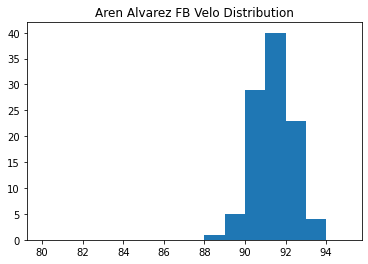

In [13]:
aavelolst = list(arenalvarezFB[arenalvarezFB.RelSpeed.notnull()].RelSpeed)
plt.title("Aren Alvarez FB Velo Distribution")
plt.hist(aavelolst, bins = velobins)

(array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  1.,  1.,  2.,  1.,  1.,  3.,  3.,  3., 14.,
        12., 12., 12.,  8., 10.,  4.,  7.,  0.,  1.,  1.]),
 array([1600, 1625, 1650, 1675, 1700, 1725, 1750, 1775, 1800, 1825, 1850,
        1875, 1900, 1925, 1950, 1975, 2000, 2025, 2050, 2075, 2100, 2125,
        2150, 2175, 2200, 2225, 2250, 2275, 2300, 2325, 2350, 2375, 2400,
        2425, 2450, 2475, 2500]),
 <BarContainer object of 36 artists>)

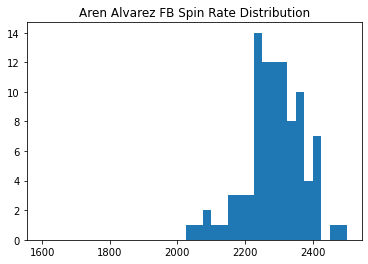

In [14]:
aaspinlst = list(arenalvarezFB[arenalvarezFB.SpinRate.notnull()].SpinRate)
plt.title("Aren Alvarez FB Spin Rate Distribution")
plt.hist(aaspinlst, bins = spinbins)

(array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  2., 13., 80.]),
 array([ 60,  62,  64,  66,  68,  70,  72,  74,  76,  78,  80,  82,  84,
         86,  88,  90,  92,  94,  96,  98, 100]),
 <BarContainer object of 20 artists>)

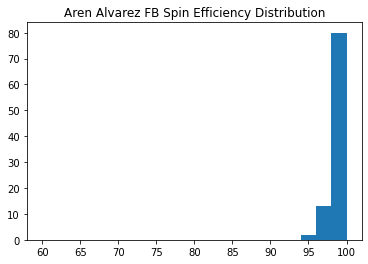

In [15]:
aaefficiencylst = list(arenalvarezFB[arenalvarezFB.yt_Efficiency.notnull()].yt_Efficiency)
plt.title("Aren Alvarez FB Spin Efficiency Distribution")
plt.hist(aaefficiencylst, bins = efficiencybins)

(array([ 0.,  0.,  1.,  0.,  0.,  5., 32., 53.,  3.,  1.,  1.,  0.]),
 array([ 8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]),
 <BarContainer object of 12 artists>)

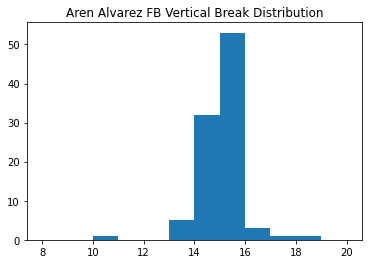

In [16]:
aavblst = list(arenalvarezFB[arenalvarezFB.InducedVertBreak.notnull()].InducedVertBreak)
plt.title("Aren Alvarez FB Vertical Break Distribution")
plt.hist(aavblst, bins = vbbins)

(array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,
         1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  2.,  7., 46., 33.,  7.,
         0.,  0.,  0.]),
 array([-15, -14, -13, -12, -11, -10,  -9,  -8,  -7,  -6,  -5,  -4,  -3,
         -2,  -1,   0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,
         11,  12,  13,  14]),
 <BarContainer object of 29 artists>)

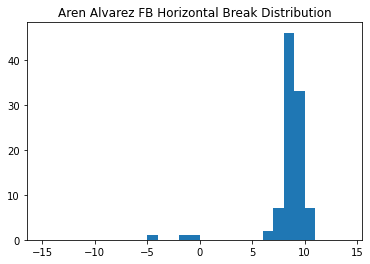

In [17]:
aahblst = list(arenalvarezFB[arenalvarezFB.HorzBreak.notnull()].HorzBreak)
plt.title("Aren Alvarez FB Horizontal Break Distribution")
plt.hist(aahblst, bins = hbbins)

(array([ 1.,  0.,  0.,  1., 53., 40.,  1.,  0.,  0.]),
 array([  0,  15,  30,  45,  60,  75,  90, 105, 120, 135]),
 <BarContainer object of 9 artists>)

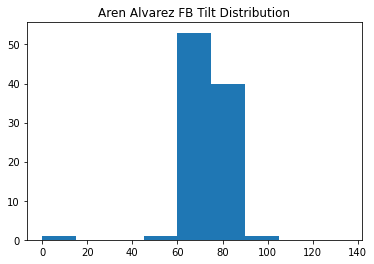

In [18]:
aatiltlst = list(tiltConv(arenalvarezFB))
plt.title("Aren Alvarez FB Tilt Distribution")
plt.hist(aatiltlst, bins = tiltpointsbinsr)

(array([ 0.,  0.,  1.,  8., 16., 20., 13., 11.,  5.,  1.,  0.,  0.,  0.,
         0.,  0.]),
 array([80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95]),
 <BarContainer object of 15 artists>)

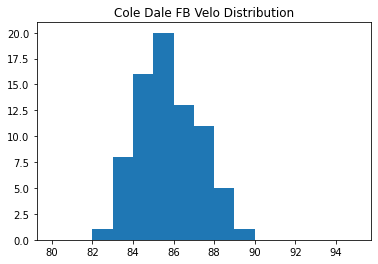

In [19]:
cdvelolst = list(coledaleFB[coledaleFB.RelSpeed.notnull()].RelSpeed)
plt.title("Cole Dale FB Velo Distribution")
plt.hist(cdvelolst, bins = velobins)

(array([ 0.,  1.,  0.,  1.,  0.,  2.,  0.,  2.,  0.,  4.,  0.,  7.,  6.,
        11.,  5.,  6.,  5.,  5.,  1.,  6.,  2.,  0.,  0.,  0.,  0.,  0.,
         1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]),
 array([1600, 1625, 1650, 1675, 1700, 1725, 1750, 1775, 1800, 1825, 1850,
        1875, 1900, 1925, 1950, 1975, 2000, 2025, 2050, 2075, 2100, 2125,
        2150, 2175, 2200, 2225, 2250, 2275, 2300, 2325, 2350, 2375, 2400,
        2425, 2450, 2475, 2500]),
 <BarContainer object of 36 artists>)

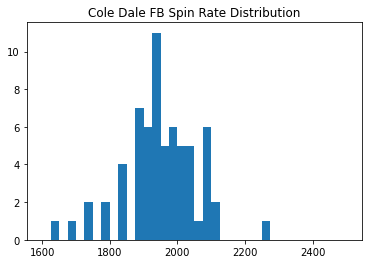

In [20]:
cdspinlst = list(coledaleFB[coledaleFB.SpinRate.notnull()].SpinRate)
plt.title("Cole Dale FB Spin Rate Distribution")
plt.hist(cdspinlst, bins = spinbins)

(array([ 3.,  2.,  5.,  6.,  4.,  5., 10.,  7.,  5.,  4.,  2.,  4.,  1.,
         2.,  0.,  0.,  1.,  1.,  0.,  0.]),
 array([ 60,  62,  64,  66,  68,  70,  72,  74,  76,  78,  80,  82,  84,
         86,  88,  90,  92,  94,  96,  98, 100]),
 <BarContainer object of 20 artists>)

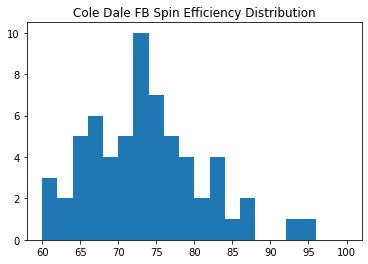

In [21]:
cdefficiencylst = list(coledaleFB[coledaleFB.yt_Efficiency.notnull()].yt_Efficiency)
plt.title("Cole Dale FB Spin Efficiency Distribution")
plt.hist(cdefficiencylst, bins = efficiencybins)

(array([ 1., 12., 10., 10., 22.,  7.,  1.,  2.,  0.,  0.,  0.,  0.]),
 array([ 8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]),
 <BarContainer object of 12 artists>)

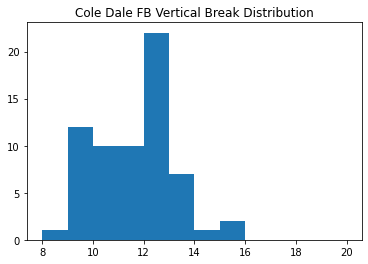

In [22]:
cdvblst = list(coledaleFB[coledaleFB.InducedVertBreak.notnull()].InducedVertBreak)
plt.title("Cole Dale FB Vertical Break Distribution")
plt.hist(cdvblst, bins = vbbins)

(array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  3.,  5., 16., 13., 10., 10.,  8.,  0.,
         0.,  0.,  0.]),
 array([-15, -14, -13, -12, -11, -10,  -9,  -8,  -7,  -6,  -5,  -4,  -3,
         -2,  -1,   0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,
         11,  12,  13,  14]),
 <BarContainer object of 29 artists>)

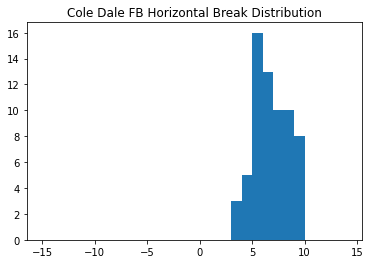

In [23]:
cdhblst = list(coledaleFB[coledaleFB.HorzBreak.notnull()].HorzBreak)
plt.title("Cole Dale FB Horizontal Break Distribution")
plt.hist(cdhblst, bins = hbbins)

(array([ 0.,  0.,  0.,  5., 17., 18., 14., 11.,  0.]),
 array([  0,  15,  30,  45,  60,  75,  90, 105, 120, 135]),
 <BarContainer object of 9 artists>)

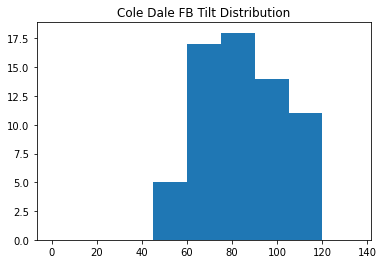

In [24]:
cdtiltlst = list(tiltConv(coledaleFB))
plt.title("Cole Dale FB Tilt Distribution")
plt.hist(cdtiltlst, bins = tiltpointsbinsr)

(array([ 0.,  2.,  0.,  0.,  1.,  4., 19., 38., 53., 40., 27., 14.,  1.,
         0.,  1.]),
 array([80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95]),
 <BarContainer object of 15 artists>)

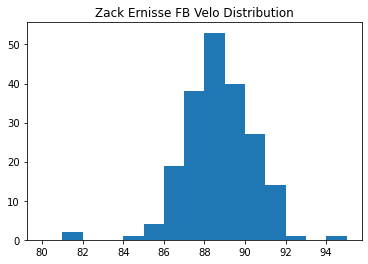

In [25]:
zevelolst = list(zackernisseFB[zackernisseFB.RelSpeed.notnull()].RelSpeed)
plt.title("Zack Ernisse FB Velo Distribution")
plt.hist(zevelolst, bins = velobins)

(array([ 2.,  1.,  1.,  1.,  0.,  1.,  4.,  4.,  4., 12., 14., 14., 14.,
        18., 21., 17., 26., 12., 10.,  5.,  3.,  3.,  1.,  4.,  1.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]),
 array([1600, 1625, 1650, 1675, 1700, 1725, 1750, 1775, 1800, 1825, 1850,
        1875, 1900, 1925, 1950, 1975, 2000, 2025, 2050, 2075, 2100, 2125,
        2150, 2175, 2200, 2225, 2250, 2275, 2300, 2325, 2350, 2375, 2400,
        2425, 2450, 2475, 2500]),
 <BarContainer object of 36 artists>)

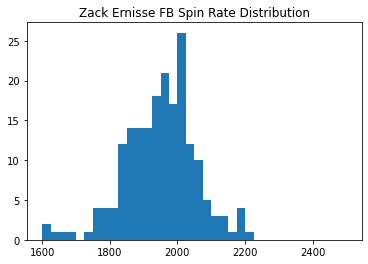

In [26]:
zespinlst = list(zackernisseFB[zackernisseFB.SpinRate.notnull()].SpinRate)
plt.title("Zack Ernisse FB Spin Rate Distribution")
plt.hist(zespinlst, bins = spinbins)

(array([ 0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  4.,
         9., 24., 33., 34., 51., 30.,  8.]),
 array([ 60,  62,  64,  66,  68,  70,  72,  74,  76,  78,  80,  82,  84,
         86,  88,  90,  92,  94,  96,  98, 100]),
 <BarContainer object of 20 artists>)

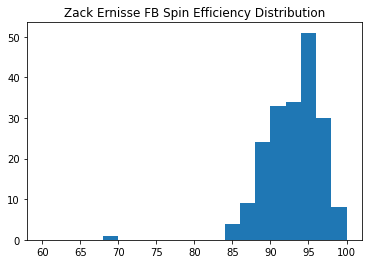

In [27]:
zeefficiencylst = list(zackernisseFB[zackernisseFB.yt_Efficiency.notnull()].yt_Efficiency)
plt.title("Zack Ernisse FB Spin Efficiency Distribution")
plt.hist(zeefficiencylst, bins = efficiencybins)

(array([ 0.,  0.,  3.,  1.,  6., 61., 89., 33.,  0.,  0.,  0.,  0.]),
 array([ 8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]),
 <BarContainer object of 12 artists>)

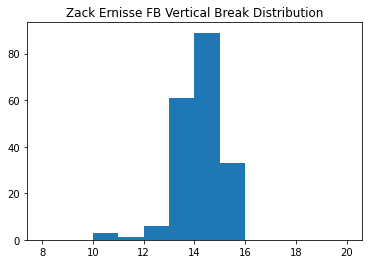

In [28]:
zevblst = list(zackernisseFB[zackernisseFB.InducedVertBreak.notnull()].InducedVertBreak)
plt.title("Zack Ernisse FB Vertical Break Distribution")
plt.hist(zevblst, bins = vbbins)

(array([  0.,   0.,   0.,   1.,   1.,   1.,   7., 100.,  80.,   2.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.]),
 array([-15, -14, -13, -12, -11, -10,  -9,  -8,  -7,  -6,  -5,  -4,  -3,
         -2,  -1,   0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,
         11,  12,  13,  14]),
 <BarContainer object of 29 artists>)

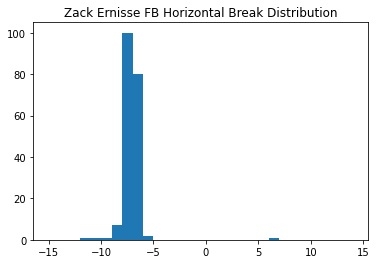

In [29]:
zehblst = list(zackernisseFB[zackernisseFB.HorzBreak.notnull()].HorzBreak)
plt.title("Zack Ernisse FB Horizontal Break Distribution")
plt.hist(zehblst, bins = hbbins)

(array([  0.,   0.,   0.,   1.,   2.,   3., 132.,  54.,   0.,   0.,   0.]),
 array([570, 585, 600, 615, 630, 645, 660, 675, 690, 705, 720, 735]),
 <BarContainer object of 11 artists>)

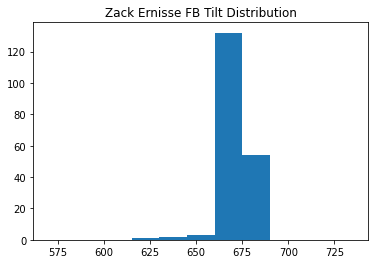

In [30]:
zetiltlst = list(tiltConv(zackernisseFB))
plt.title("Zack Ernisse FB Tilt Distribution")
plt.hist(zetiltlst, bins = tiltpointsbinsl)

(array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  1., 12., 45., 34., 27.,
        18.,  2.]),
 array([80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95]),
 <BarContainer object of 15 artists>)

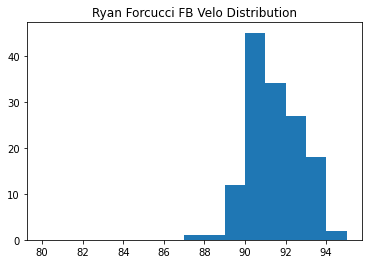

In [31]:
rfvelolst = list(ryanforcucciFB[ryanforcucciFB.RelSpeed.notnull()].RelSpeed)
plt.title("Ryan Forcucci FB Velo Distribution")
plt.hist(rfvelolst, bins = velobins)

(array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  1.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  2.,  4.,  1.,  5.,  4.,  4.,  9.,
        17., 17., 12.,  9.,  4.,  7.,  5.,  5.,  0.,  0.]),
 array([1600, 1625, 1650, 1675, 1700, 1725, 1750, 1775, 1800, 1825, 1850,
        1875, 1900, 1925, 1950, 1975, 2000, 2025, 2050, 2075, 2100, 2125,
        2150, 2175, 2200, 2225, 2250, 2275, 2300, 2325, 2350, 2375, 2400,
        2425, 2450, 2475, 2500]),
 <BarContainer object of 36 artists>)

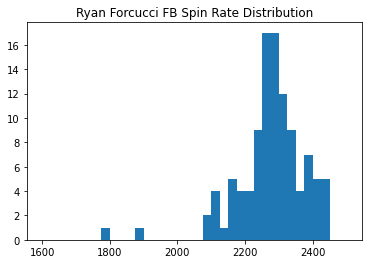

In [32]:
rfspinlst = list(ryanforcucciFB[ryanforcucciFB.SpinRate.notnull()].SpinRate)
plt.title("Ryan Forcucci FB Spin Rate Distribution")
plt.hist(rfspinlst, bins = spinbins)

(array([ 0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  1.,  2., 16., 89.]),
 array([ 60,  62,  64,  66,  68,  70,  72,  74,  76,  78,  80,  82,  84,
         86,  88,  90,  92,  94,  96,  98, 100]),
 <BarContainer object of 20 artists>)

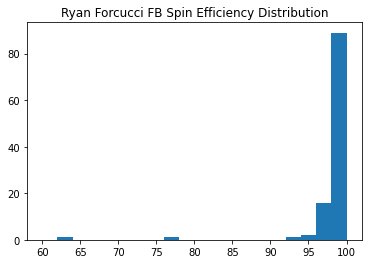

In [33]:
rfefficiencylst = list(ryanforcucciFB[ryanforcucciFB.yt_Efficiency.notnull()].yt_Efficiency)
plt.title("Ryan Forcucci FB Spin Efficiency Distribution")
plt.hist(rfefficiencylst, bins = efficiencybins)

(array([ 0.,  0.,  2.,  4., 13., 53., 31.,  3.,  0.,  0.,  0.,  0.]),
 array([ 8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]),
 <BarContainer object of 12 artists>)

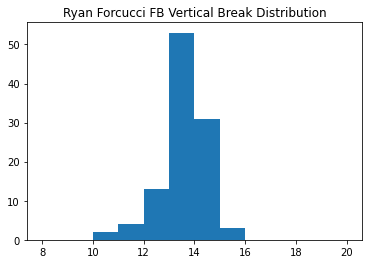

In [34]:
rfvblst = list(ryanforcucciFB[ryanforcucciFB.InducedVertBreak.notnull()].InducedVertBreak)
plt.title("Ryan Forcucci FB Vertical Break Distribution")
plt.hist(rfvblst, bins = vbbins)

(array([ 0.,  0.,  0.,  0.,  2.,  0.,  0.,  1.,  1.,  0.,  1.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  3., 27., 50.,
        23.,  3.,  0.]),
 array([-15, -14, -13, -12, -11, -10,  -9,  -8,  -7,  -6,  -5,  -4,  -3,
         -2,  -1,   0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,
         11,  12,  13,  14]),
 <BarContainer object of 29 artists>)

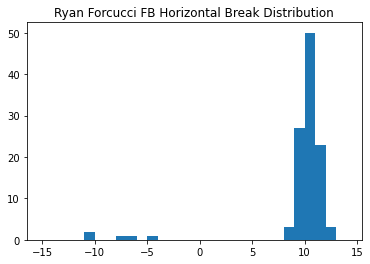

In [35]:
rfhblst = list(ryanforcucciFB[ryanforcucciFB.HorzBreak.notnull()].HorzBreak)
plt.title("Ryan Forcucci FB Horizontal Break Distribution")
plt.hist(rfhblst, bins = hbbins)

(array([ 0.,  0.,  0.,  0.,  1., 48., 52.,  4.,  1.]),
 array([  0,  15,  30,  45,  60,  75,  90, 105, 120, 135]),
 <BarContainer object of 9 artists>)

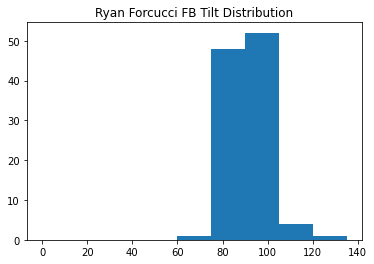

In [36]:
rftiltlst = list(tiltConv(ryanforcucciFB))
plt.title("Ryan Forcucci FB Tilt Distribution")
plt.hist(rftiltlst, bins = tiltpointsbinsr)

(array([4., 3., 3., 5., 1., 2., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95]),
 <BarContainer object of 15 artists>)

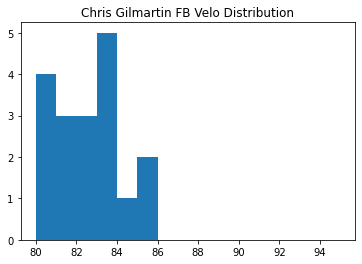

In [37]:
cgvelolst = list(chrisgilmartinFB[chrisgilmartinFB.RelSpeed.notnull()].RelSpeed)
plt.title("Chris Gilmartin FB Velo Distribution")
plt.hist(cgvelolst, bins = velobins)

(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 3., 0., 2., 2., 3., 3.,
        4., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0.]),
 array([1600, 1625, 1650, 1675, 1700, 1725, 1750, 1775, 1800, 1825, 1850,
        1875, 1900, 1925, 1950, 1975, 2000, 2025, 2050, 2075, 2100, 2125,
        2150, 2175, 2200, 2225, 2250, 2275, 2300, 2325, 2350, 2375, 2400,
        2425, 2450, 2475, 2500]),
 <BarContainer object of 36 artists>)

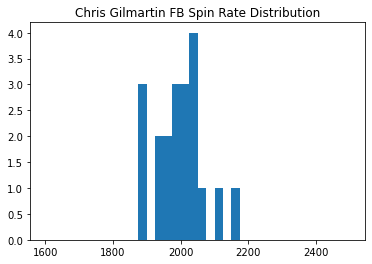

In [38]:
cgspinlst = list(chrisgilmartinFB[chrisgilmartinFB.SpinRate.notnull()].SpinRate)
plt.title("Chris Gilmartin FB Spin Rate Distribution")
plt.hist(cgspinlst, bins = spinbins)

(array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  2., 18.]),
 array([ 60,  62,  64,  66,  68,  70,  72,  74,  76,  78,  80,  82,  84,
         86,  88,  90,  92,  94,  96,  98, 100]),
 <BarContainer object of 20 artists>)

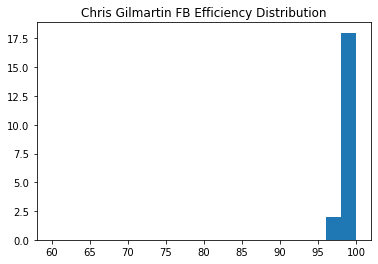

In [39]:
cgefficiencylst = list(chrisgilmartinFB[chrisgilmartinFB.yt_Efficiency.notnull()].yt_Efficiency)
plt.title("Chris Gilmartin FB Efficiency Distribution")
plt.hist(cgefficiencylst, bins = efficiencybins)

(array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 12.,  8.,  0.,  0.]),
 array([ 8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]),
 <BarContainer object of 12 artists>)

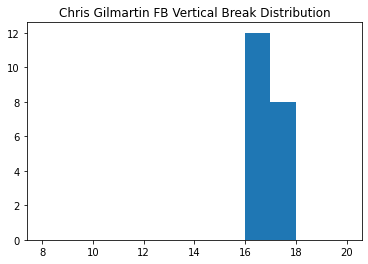

In [40]:
cgvblst = list(chrisgilmartinFB[chrisgilmartinFB.InducedVertBreak.notnull()].InducedVertBreak)
plt.title("Chris Gilmartin FB Vertical Break Distribution")
plt.hist(cgvblst, bins = vbbins)

(array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  5., 12.,  3.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.]),
 array([-15, -14, -13, -12, -11, -10,  -9,  -8,  -7,  -6,  -5,  -4,  -3,
         -2,  -1,   0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,
         11,  12,  13,  14]),
 <BarContainer object of 29 artists>)

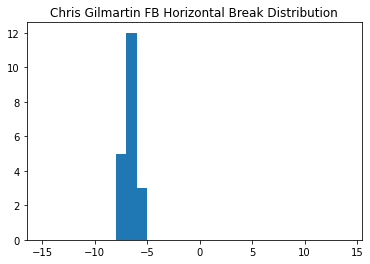

In [41]:
cghblst = list(chrisgilmartinFB[chrisgilmartinFB.HorzBreak.notnull()].HorzBreak)
plt.title("Chris Gilmartin FB Horizontal Break Distribution")
plt.hist(cghblst, bins = hbbins)

(array([ 0.,  0.,  0.,  0.,  0.,  0.,  4., 16.,  0.,  0.,  0.]),
 array([570, 585, 600, 615, 630, 645, 660, 675, 690, 705, 720, 735]),
 <BarContainer object of 11 artists>)

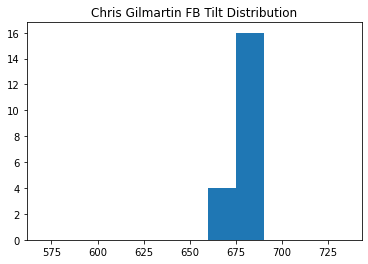

In [42]:
cgtiltlst = list(tiltConv(chrisgilmartinFB))
plt.title("Chris Gilmartin FB Tilt Distribution")
plt.hist(cgtiltlst, bins = tiltpointsbinsl)

(array([ 4.,  7., 12., 14., 10.,  2.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.]),
 array([80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95]),
 <BarContainer object of 15 artists>)

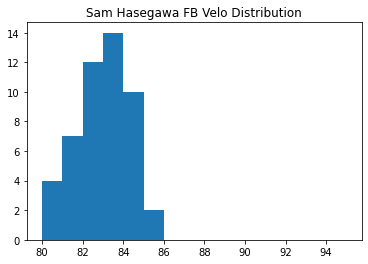

In [43]:
shvelolst = list(samhasegawaFB[samhasegawaFB.RelSpeed.notnull()].RelSpeed)
plt.title("Sam Hasegawa FB Velo Distribution")
plt.hist(shvelolst, bins = velobins)

(array([0., 0., 0., 1., 3., 5., 4., 3., 8., 9., 6., 2., 2., 5., 2., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0.]),
 array([1600, 1625, 1650, 1675, 1700, 1725, 1750, 1775, 1800, 1825, 1850,
        1875, 1900, 1925, 1950, 1975, 2000, 2025, 2050, 2075, 2100, 2125,
        2150, 2175, 2200, 2225, 2250, 2275, 2300, 2325, 2350, 2375, 2400,
        2425, 2450, 2475, 2500]),
 <BarContainer object of 36 artists>)

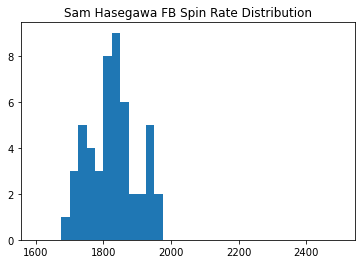

In [44]:
shspinlst = list(samhasegawaFB[samhasegawaFB.SpinRate.notnull()].SpinRate)
plt.title("Sam Hasegawa FB Spin Rate Distribution")
plt.hist(shspinlst, bins = spinbins)

(array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  3.,  2.,  8.,  8.,
        14.,  7.,  3.,  3.,  0.,  0.,  0.]),
 array([ 60,  62,  64,  66,  68,  70,  72,  74,  76,  78,  80,  82,  84,
         86,  88,  90,  92,  94,  96,  98, 100]),
 <BarContainer object of 20 artists>)

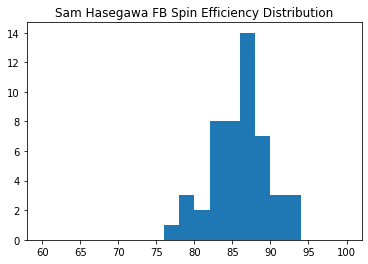

In [45]:
shefficiencylst = list(samhasegawaFB[samhasegawaFB.yt_Efficiency.notnull()].yt_Efficiency)
plt.title("Sam Hasegawa FB Spin Efficiency Distribution")
plt.hist(shefficiencylst, bins = efficiencybins)

(array([ 0.,  1.,  0.,  0.,  0.,  0., 15., 29.,  5.,  0.,  0.,  0.]),
 array([ 8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]),
 <BarContainer object of 12 artists>)

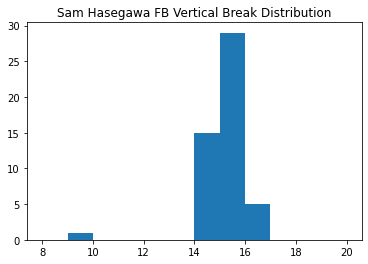

In [46]:
shvblst = list(samhasegawaFB[samhasegawaFB.InducedVertBreak.notnull()].InducedVertBreak)
plt.title("Sam Hasegawa FB Vertical Break Distribution")
plt.hist(shvblst, bins = vbbins)

(array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 10.,
        20., 15.,  4.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.]),
 array([-15, -14, -13, -12, -11, -10,  -9,  -8,  -7,  -6,  -5,  -4,  -3,
         -2,  -1,   0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,
         11,  12,  13,  14]),
 <BarContainer object of 29 artists>)

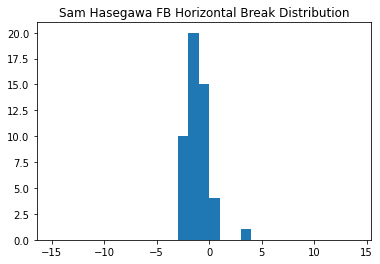

In [47]:
shhblst = list(samhasegawaFB[samhasegawaFB.HorzBreak.notnull()].HorzBreak)
plt.title("Sam Hasegawa FB Horizontal Break Distribution")
plt.hist(shhblst, bins = hbbins)

(array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  7., 37.,  6.]),
 array([570, 585, 600, 615, 630, 645, 660, 675, 690, 705, 720, 735]),
 <BarContainer object of 11 artists>)

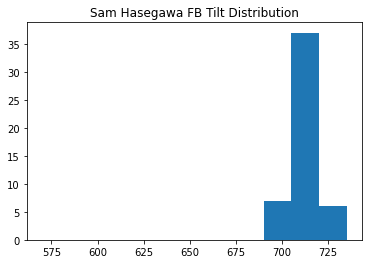

In [48]:
shtiltlst = list(tiltConv(samhasegawaFB))
plt.title("Sam Hasegawa FB Tilt Distribution")
plt.hist(shtiltlst, bins = tiltpointsbinsl)

(array([ 0.,  0.,  0.,  0.,  2., 10., 25., 29.,  7.,  2.,  0.,  0.,  0.,
         0.,  0.]),
 array([80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95]),
 <BarContainer object of 15 artists>)

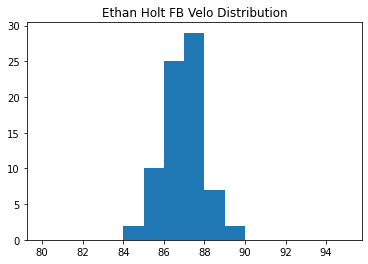

In [49]:
ehvelolst = list(ethanholtFB[ethanholtFB.RelSpeed.notnull()].RelSpeed)
plt.title("Ethan Holt FB Velo Distribution")
plt.hist(ehvelolst, bins = velobins)

(array([ 1.,  0.,  0.,  5.,  3.,  5., 14.,  9.,  9.,  6.,  2.,  4.,  1.,
         2.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]),
 array([1600, 1625, 1650, 1675, 1700, 1725, 1750, 1775, 1800, 1825, 1850,
        1875, 1900, 1925, 1950, 1975, 2000, 2025, 2050, 2075, 2100, 2125,
        2150, 2175, 2200, 2225, 2250, 2275, 2300, 2325, 2350, 2375, 2400,
        2425, 2450, 2475, 2500]),
 <BarContainer object of 36 artists>)

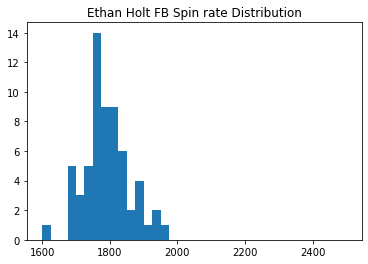

In [50]:
ehspinlst = list(ethanholtFB[ethanholtFB.SpinRate.notnull()].SpinRate)
plt.title("Ethan Holt FB Spin rate Distribution")
plt.hist(ehspinlst, bins = spinbins)

(array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  6., 11., 14.,
        12., 11.,  5.,  2.,  2.,  0.,  1.]),
 array([ 60,  62,  64,  66,  68,  70,  72,  74,  76,  78,  80,  82,  84,
         86,  88,  90,  92,  94,  96,  98, 100]),
 <BarContainer object of 20 artists>)

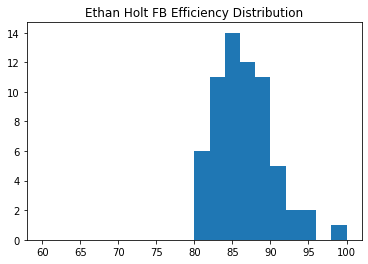

In [51]:
ehefficiencylst = list(ethanholtFB[ethanholtFB.yt_Efficiency.notnull()].yt_Efficiency)
plt.title("Ethan Holt FB Efficiency Distribution")
plt.hist(ehefficiencylst, bins = efficiencybins)

(array([ 1., 13., 38., 10.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.]),
 array([ 8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]),
 <BarContainer object of 12 artists>)

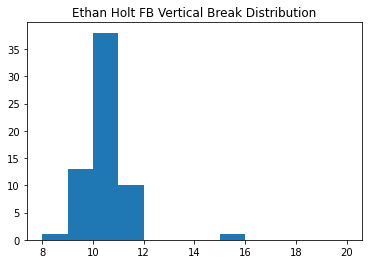

In [52]:
ehvblst = list(ethanholtFB[ethanholtFB.InducedVertBreak.notnull()].InducedVertBreak)
plt.title("Ethan Holt FB Vertical Break Distribution")
plt.hist(ehvblst, bins = vbbins)

(array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  5., 30., 21.,  6.,
         1.,  0.,  0.]),
 array([-15, -14, -13, -12, -11, -10,  -9,  -8,  -7,  -6,  -5,  -4,  -3,
         -2,  -1,   0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,
         11,  12,  13,  14]),
 <BarContainer object of 29 artists>)

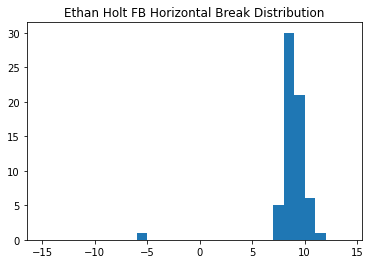

In [53]:
ehhblst = list(ethanholtFB[ethanholtFB.HorzBreak.notnull()].HorzBreak)
plt.title("Ethan Holt FB Horizontal Break Distribution")
plt.hist(ehhblst, bins = hbbins)

(array([ 0.,  0.,  0.,  0.,  1.,  1., 36., 25.,  0.]),
 array([  0,  15,  30,  45,  60,  75,  90, 105, 120, 135]),
 <BarContainer object of 9 artists>)

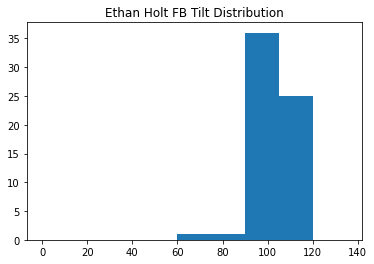

In [54]:
ehtiltlst = list(tiltConv(ethanholtFB))
plt.title("Ethan Holt FB Tilt Distribution")
plt.hist(ehtiltlst, bins = tiltpointsbinsr)

(array([ 0.,  0.,  0.,  0.,  8., 16., 42., 29., 10.,  2.,  0.,  0.,  0.,
         0.,  0.]),
 array([80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95]),
 <BarContainer object of 15 artists>)

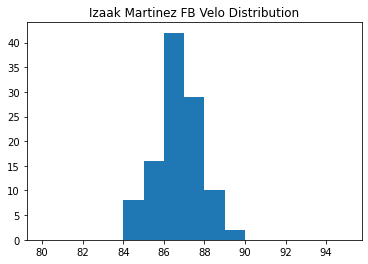

In [55]:
imvelolst = list(izaakmartinezFB[izaakmartinezFB.RelSpeed.notnull()].RelSpeed)
plt.title("Izaak Martinez FB Velo Distribution")
plt.hist(imvelolst, bins = velobins)

(array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,  6.,
        10.,  9., 12., 22.,  9.,  6.,  3.,  4.,  3.,  0.]),
 array([1600, 1625, 1650, 1675, 1700, 1725, 1750, 1775, 1800, 1825, 1850,
        1875, 1900, 1925, 1950, 1975, 2000, 2025, 2050, 2075, 2100, 2125,
        2150, 2175, 2200, 2225, 2250, 2275, 2300, 2325, 2350, 2375, 2400,
        2425, 2450, 2475, 2500]),
 <BarContainer object of 36 artists>)

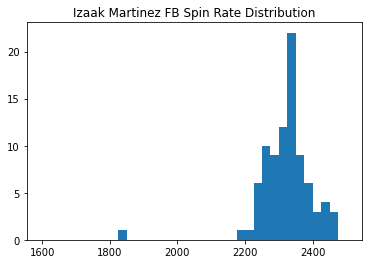

In [56]:
imspinlst = list(izaakmartinezFB[izaakmartinezFB.SpinRate.notnull()].SpinRate)
plt.title("Izaak Martinez FB Spin Rate Distribution")
plt.hist(imspinlst, bins = spinbins)

(array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,
         0.,  0.,  3.,  7., 20., 46., 11.]),
 array([ 60,  62,  64,  66,  68,  70,  72,  74,  76,  78,  80,  82,  84,
         86,  88,  90,  92,  94,  96,  98, 100]),
 <BarContainer object of 20 artists>)

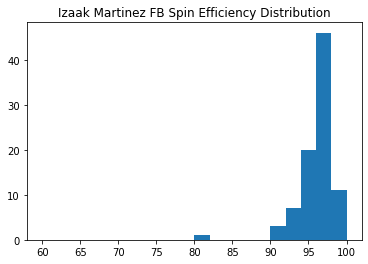

In [57]:
imefficiencylst = list(izaakmartinezFB[izaakmartinezFB.yt_Efficiency.notnull()].yt_Efficiency)
plt.title("Izaak Martinez FB Spin Efficiency Distribution")
plt.hist(imefficiencylst, bins = efficiencybins)

(array([ 0.,  0.,  1.,  0.,  0.,  0.,  1.,  0.,  2., 33., 44.,  5.]),
 array([ 8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]),
 <BarContainer object of 12 artists>)

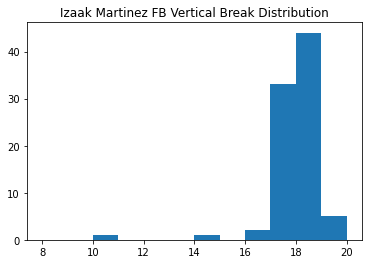

In [58]:
imvblst = list(izaakmartinezFB[izaakmartinezFB.InducedVertBreak.notnull()].InducedVertBreak)
plt.title("Izaak Martinez FB Vertical Break Distribution")
plt.hist(imvblst, bins = vbbins)

(array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  9., 35., 35.,  6.,
         0.,  1.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  2.,  0.]),
 array([-15, -14, -13, -12, -11, -10,  -9,  -8,  -7,  -6,  -5,  -4,  -3,
         -2,  -1,   0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,
         11,  12,  13,  14]),
 <BarContainer object of 29 artists>)

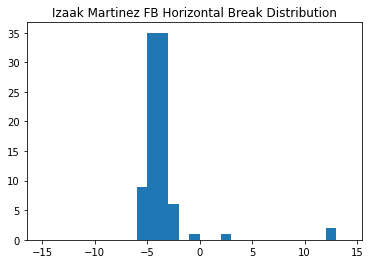

In [59]:
imhblst = list(izaakmartinezFB[izaakmartinezFB.HorzBreak.notnull()].HorzBreak)
plt.title("Izaak Martinez FB Horizontal Break Distribution")
plt.hist(imhblst, bins = hbbins)

(array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  6., 71.,  9.,  0.]),
 array([570, 585, 600, 615, 630, 645, 660, 675, 690, 705, 720, 735]),
 <BarContainer object of 11 artists>)

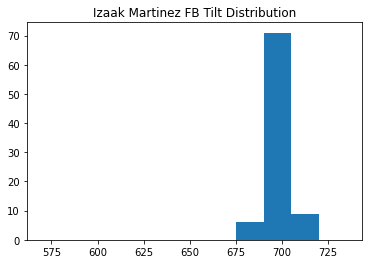

In [60]:
imtiltlst = list(tiltConv(izaakmartinezFB))
plt.title("Izaak Martinez FB Tilt Distribution")
plt.hist(imtiltlst, bins = tiltpointsbinsl)

(array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  4., 12., 14., 10.,  3.,  2.,
         0.,  0.]),
 array([80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95]),
 <BarContainer object of 15 artists>)

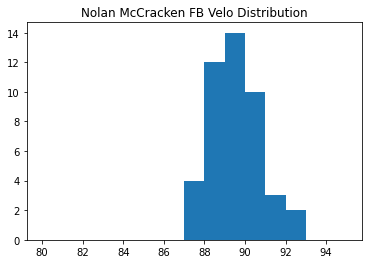

In [61]:
nmvelolst = list(nolanmccrackenFB[nolanmccrackenFB.RelSpeed.notnull()].RelSpeed)
plt.title("Nolan McCracken FB Velo Distribution")
plt.hist(nmvelolst, bins = velobins)

(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 1., 0., 1., 6., 8., 6., 6., 5., 5., 1., 0., 0., 0., 0.,
        0., 0.]),
 array([1600, 1625, 1650, 1675, 1700, 1725, 1750, 1775, 1800, 1825, 1850,
        1875, 1900, 1925, 1950, 1975, 2000, 2025, 2050, 2075, 2100, 2125,
        2150, 2175, 2200, 2225, 2250, 2275, 2300, 2325, 2350, 2375, 2400,
        2425, 2450, 2475, 2500]),
 <BarContainer object of 36 artists>)

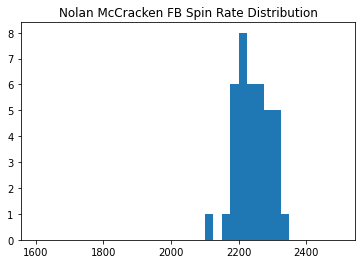

In [62]:
nmspinlst = list(nolanmccrackenFB[nolanmccrackenFB.SpinRate.notnull()].SpinRate)
plt.title("Nolan McCracken FB Spin Rate Distribution")
plt.hist(nmspinlst, bins = spinbins)

(array([ 0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  3.,
         4.,  7., 15.,  5.,  4.,  1.,  0.]),
 array([ 60,  62,  64,  66,  68,  70,  72,  74,  76,  78,  80,  82,  84,
         86,  88,  90,  92,  94,  96,  98, 100]),
 <BarContainer object of 20 artists>)

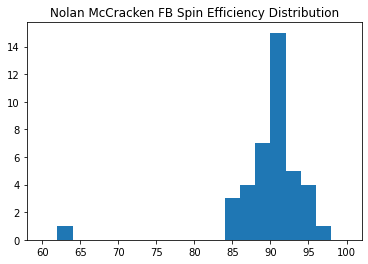

In [63]:
nmefficiencylst = list(nolanmccrackenFB[nolanmccrackenFB.yt_Efficiency.notnull()].yt_Efficiency)
plt.title("Nolan McCracken FB Spin Efficiency Distribution")
plt.hist(nmefficiencylst, bins = efficiencybins)

(array([ 0.,  0.,  0.,  0.,  0.,  0.,  0., 11., 25.,  1.,  1.,  0.]),
 array([ 8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]),
 <BarContainer object of 12 artists>)

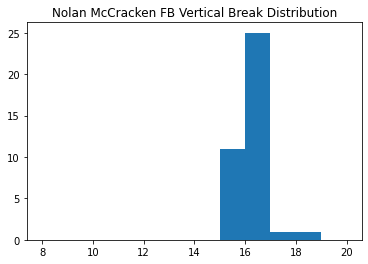

In [64]:
nmvblst = list(nolanmccrackenFB[nolanmccrackenFB.InducedVertBreak.notnull()].InducedVertBreak)
plt.title("Nolan McCracken FB Vertical Break Distribution")
plt.hist(nmvblst, bins = vbbins)

(array([ 0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  1.,  5., 15., 15.,  2.,  1.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.]),
 array([-15, -14, -13, -12, -11, -10,  -9,  -8,  -7,  -6,  -5,  -4,  -3,
         -2,  -1,   0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,
         11,  12,  13,  14]),
 <BarContainer object of 29 artists>)

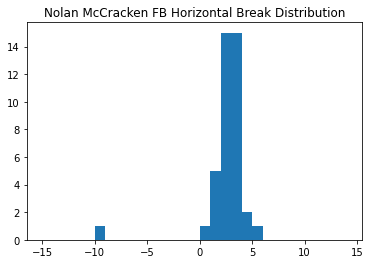

In [65]:
nmhblst = list(nolanmccrackenFB[nolanmccrackenFB.HorzBreak.notnull()].HorzBreak)
plt.title("Nolan McCracken FB Horizontal Break Distribution")
plt.hist(nmhblst, bins = hbbins)

(array([ 0.,  9., 27.,  2.,  0.,  0.,  0.,  0.,  0.]),
 array([  0,  15,  30,  45,  60,  75,  90, 105, 120, 135]),
 <BarContainer object of 9 artists>)

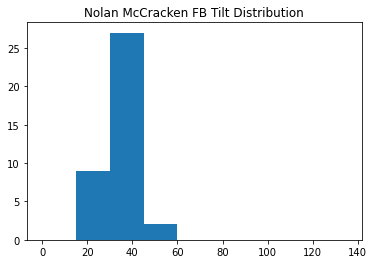

In [66]:
nmtiltlst = list(tiltConv(nolanmccrackenFB))
plt.title("Nolan McCracken FB Tilt Distribution")
plt.hist(nmtiltlst, bins = tiltpointsbinsr)

(array([ 0.,  0.,  0.,  0.,  0.,  5.,  5.,  8., 27., 14.,  4.,  0.,  0.,
         0.,  0.]),
 array([80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95]),
 <BarContainer object of 15 artists>)

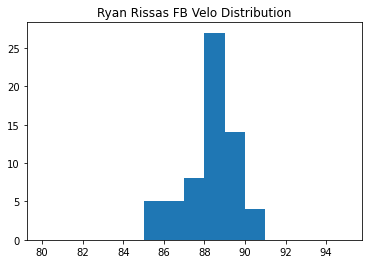

In [67]:
rrvelolst = list(ryanrissasFB[ryanrissasFB.RelSpeed.notnull()].RelSpeed)
plt.title("Ryan Rissas FB Velo Distribution")
plt.hist(rrvelolst, bins = velobins)

(array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  1.,  2.,  0.,  0.,  0.,  6.,  9.,  5., 13.,  5.,  6.,  5.,
         4.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]),
 array([1600, 1625, 1650, 1675, 1700, 1725, 1750, 1775, 1800, 1825, 1850,
        1875, 1900, 1925, 1950, 1975, 2000, 2025, 2050, 2075, 2100, 2125,
        2150, 2175, 2200, 2225, 2250, 2275, 2300, 2325, 2350, 2375, 2400,
        2425, 2450, 2475, 2500]),
 <BarContainer object of 36 artists>)

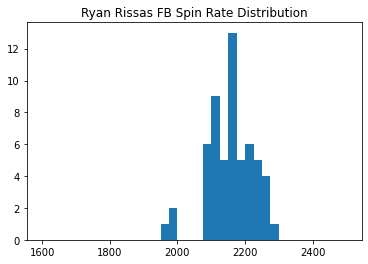

In [68]:
rrspinlst = list(ryanrissasFB[ryanrissasFB.SpinRate.notnull()].SpinRate)
plt.title("Ryan Rissas FB Spin Rate Distribution")
plt.hist(rrspinlst, bins = spinbins)

(array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  1.,  3.,  4.,  5., 21., 23.]),
 array([ 60,  62,  64,  66,  68,  70,  72,  74,  76,  78,  80,  82,  84,
         86,  88,  90,  92,  94,  96,  98, 100]),
 <BarContainer object of 20 artists>)

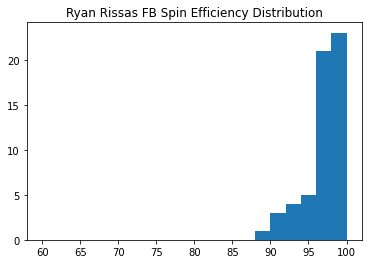

In [69]:
rrefficiencylst = list(ryanrissasFB[ryanrissasFB.yt_Efficiency.notnull()].yt_Efficiency)
plt.title("Ryan Rissas FB Spin Efficiency Distribution")
plt.hist(rrefficiencylst, bins = efficiencybins)

(array([ 0.,  0.,  0.,  1.,  0.,  0.,  0.,  1.,  7., 35., 12.,  1.]),
 array([ 8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]),
 <BarContainer object of 12 artists>)

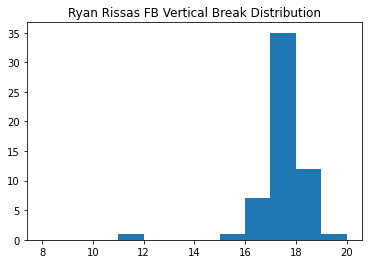

In [70]:
rrvblst = list(ryanrissasFB[ryanrissasFB.InducedVertBreak.notnull()].InducedVertBreak)
plt.title("Ryan Rissas FB Vertical Break Distribution")
plt.hist(rrvblst, bins = vbbins)

(array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  4., 13., 19.,
        14.,  5.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,
         0.,  0.,  0.]),
 array([-15, -14, -13, -12, -11, -10,  -9,  -8,  -7,  -6,  -5,  -4,  -3,
         -2,  -1,   0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,
         11,  12,  13,  14]),
 <BarContainer object of 29 artists>)

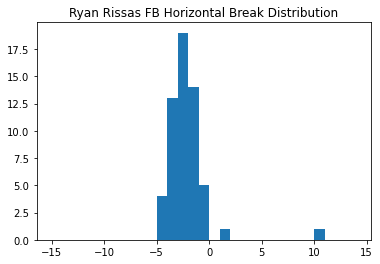

In [71]:
rrhblst = list(ryanrissasFB[ryanrissasFB.HorzBreak.notnull()].HorzBreak)
plt.title("Ryan Rissas FB Horizontal Break Distribution")
plt.hist(rrhblst, bins = hbbins)

(array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 17., 36.,  3.]),
 array([570, 585, 600, 615, 630, 645, 660, 675, 690, 705, 720, 735]),
 <BarContainer object of 11 artists>)

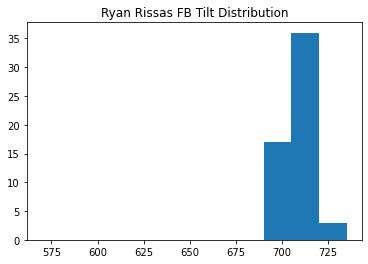

In [72]:
rrtiltlst = list(tiltConv(ryanrissasFB))
plt.title("Ryan Rissas FB Tilt Distribution")
plt.hist(rrtiltlst, bins = tiltpointsbinsl)

(array([ 0.,  0.,  1.,  3.,  5., 19., 13.,  9., 13.,  5.,  1.,  3.,  0.,
         0.,  0.]),
 array([80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95]),
 <BarContainer object of 15 artists>)

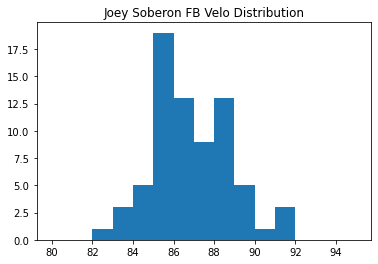

In [73]:
jsvelolst = list(joeysoberonFB[joeysoberonFB.RelSpeed.notnull()].RelSpeed)
plt.title("Joey Soberon FB Velo Distribution")
plt.hist(jsvelolst, bins = velobins)

(array([0., 0., 0., 0., 1., 0., 2., 2., 3., 6., 6., 7., 3., 4., 5., 4., 5.,
        5., 4., 3., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0.]),
 array([1600, 1625, 1650, 1675, 1700, 1725, 1750, 1775, 1800, 1825, 1850,
        1875, 1900, 1925, 1950, 1975, 2000, 2025, 2050, 2075, 2100, 2125,
        2150, 2175, 2200, 2225, 2250, 2275, 2300, 2325, 2350, 2375, 2400,
        2425, 2450, 2475, 2500]),
 <BarContainer object of 36 artists>)

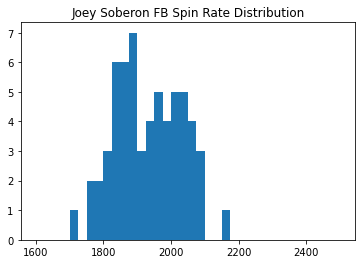

In [74]:
jsspinlst = list(joeysoberonFB[joeysoberonFB.SpinRate.notnull()].SpinRate)
plt.title("Joey Soberon FB Spin Rate Distribution")
plt.hist(jsspinlst, bins = spinbins)

(array([ 0.,  1.,  0.,  1.,  0.,  0.,  0.,  0.,  1.,  2.,  2.,  4.,  3.,
         4.,  7.,  8.,  9.,  7., 10.,  2.]),
 array([ 60,  62,  64,  66,  68,  70,  72,  74,  76,  78,  80,  82,  84,
         86,  88,  90,  92,  94,  96,  98, 100]),
 <BarContainer object of 20 artists>)

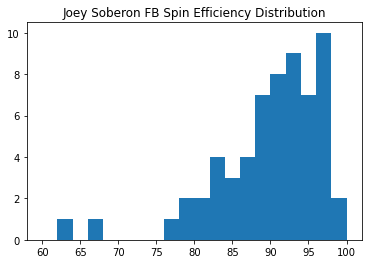

In [75]:
jsefficiencylst = list(joeysoberonFB[joeysoberonFB.yt_Efficiency.notnull()].yt_Efficiency)
plt.title("Joey Soberon FB Spin Efficiency Distribution")
plt.hist(jsefficiencylst, bins = efficiencybins)

(array([ 4.,  4., 12., 10., 18., 11.,  2.,  0.,  0.,  0.,  0.,  0.]),
 array([ 8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]),
 <BarContainer object of 12 artists>)

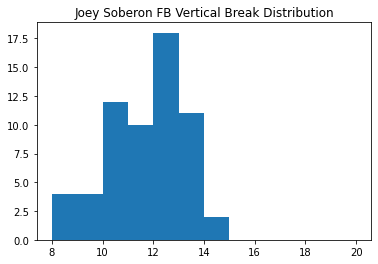

In [76]:
jsvblst = list(joeysoberonFB[joeysoberonFB.InducedVertBreak.notnull()].InducedVertBreak)
plt.title("Joey Soberon FB Vertical Break Distribution")
plt.hist(jsvblst, bins = vbbins)

(array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  2.,  9., 16., 25.,  4.,
         3.,  2.,  0.]),
 array([-15, -14, -13, -12, -11, -10,  -9,  -8,  -7,  -6,  -5,  -4,  -3,
         -2,  -1,   0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,
         11,  12,  13,  14]),
 <BarContainer object of 29 artists>)

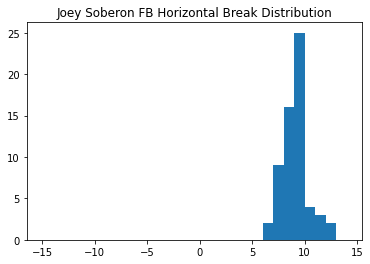

In [77]:
jshblst = list(joeysoberonFB[joeysoberonFB.HorzBreak.notnull()].HorzBreak)
plt.title("Joey Soberon FB Horizontal Break Distribution")
plt.hist(jshblst, bins = hbbins)

(array([ 0.,  0.,  0.,  0.,  1., 20., 25., 10.,  5.]),
 array([  0,  15,  30,  45,  60,  75,  90, 105, 120, 135]),
 <BarContainer object of 9 artists>)

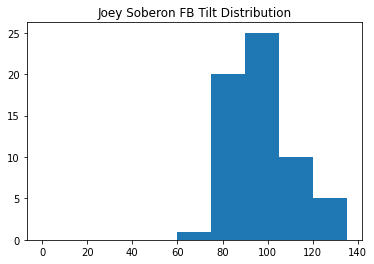

In [78]:
jstiltlst = list(tiltConv(joeysoberonFB))
plt.title("Joey Soberon FB Tilt Distribution")
plt.hist(jstiltlst, bins = tiltpointsbinsr)